### Stores Analytics

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("stores.csv")

In [5]:
df.head(10)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [6]:
column_totals = df.apply(lambda col: col.sum())
df.loc["Column_Totals"] = column_totals

In [7]:
df.loc["Row_Totals"] = df.apply(lambda row: row.sum(), axis= 1)

In [8]:
df.tail(20)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
878,879.0,1205.0,1468.0,1210.0,61210.0
879,880.0,1792.0,2131.0,810.0,76420.0
880,881.0,1263.0,1516.0,780.0,70980.0
881,882.0,1344.0,1605.0,1160.0,76740.0
882,883.0,1819.0,2187.0,590.0,47920.0
883,884.0,1357.0,1625.0,1140.0,52160.0
884,885.0,1396.0,1673.0,690.0,32740.0
885,886.0,1118.0,1337.0,560.0,72270.0
886,887.0,1655.0,1986.0,1150.0,77430.0
887,888.0,1156.0,1398.0,140.0,92370.0


### Airbnb Analytics

In [9]:
df2 = pd.read_csv("Airbnb_Open_Data.csv", low_memory = False)

In [10]:
df2["country"].isna().sum()

np.int64(532)

In [11]:
df2 = df2.dropna(subset =["country"])

In [12]:
duplicates = df2[df2.duplicated(keep ="first")]

In [13]:
print("Number of duplicates :",duplicates.shape[0])

Number of duplicates : 541


In [14]:
print(df2.columns.tolist())

['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


In [15]:
df2 = df2.drop_duplicates()

In [16]:
neighborhood_listings = df2.groupby('neighbourhood group')['id'].count().reset_index(name='Number_of_Listings')
print(neighborhood_listings)


  neighbourhood group  Number_of_Listings
0               Bronx                2676
1            Brooklyn               41410
2           Manhattan               43334
3              Queens               13135
4       Staten Island                 941
5             brookln                   1
6            manhatan                   1


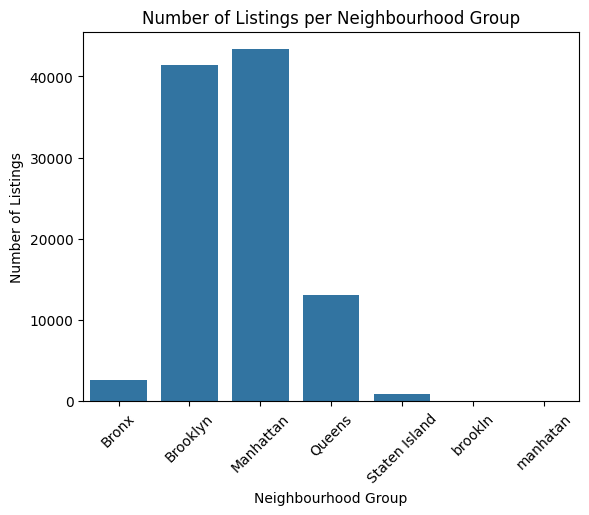

In [17]:
sns.barplot(x='neighbourhood group', y='Number_of_Listings', data=neighborhood_listings)
plt.title('Number of Listings per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()



### Cleaning Political tweets

In [21]:
import re

In [18]:
df3 = pd.read_csv("Politics_Tweets.csv")

In [20]:
df3.head(10)

,id,text,created_at,author_id,in_reply_to_user_id,lang,author,entities,referenced_tweets,media,geo
0,1.531424e+18,"Hatupangwingwi!!!, Drop your handles let's ga...",2022-05-30T23:55:10.000Z,1.452290e+18,NaN,en,"{""protected"":false,""id"":""1452290223124140040"",...",NaN,NaN,NaN,NaN
1,1.531422e+18,RT @BMuhadis: @nduyamuthama Wooh.! Hard Tackle...,2022-05-30T23:47:16.000Z,3.761629e+08,NaN,en,"{""protected"":false,""id"":""376162917"",""created_a...",NaN,"[{""type"":""retweeted"",""id"":""1531285748950913024...",NaN,NaN
2,1.531410e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T23:01:19.000Z,9.334014e+17,NaN,en,"{""protected"":false,""id"":""933401400058531854"",""...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",NaN,NaN
3,1.531409e+18,"Hatupangwingwi!!!, Comment using ❤️ and foll...",2022-05-30T22:55:27.000Z,1.452290e+18,NaN,en,"{""protected"":false,""id"":""1452290223124140040"",...",NaN,NaN,NaN,NaN
4,1.531406e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T22:45:09.000Z,4.170950e+09,NaN,en,"{""protected"":false,""id"":""4170949582"",""created_...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",NaN,NaN
5,1.531403e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T22:31:04.000Z,1.171876e+18,NaN,en,"{""protected"":false,""id"":""1171876252178890757"",...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",NaN,NaN
6,1.531394e+18,"Hatupangwingwi!!!, Drop your handles let's ga...",2022-05-30T21:55:25.000Z,1.452290e+18,NaN,en,"{""protected"":false,""id"":""1452290223124140040"",...",NaN,NaN,NaN,NaN
7,1.531388e+18,"@GitobuImanyara @Moraah__ Waaah,am so sorry si...",2022-05-30T21:31:32.000Z,1.144545e+18,42970712.0,en,"{""protected"":false,""id"":""1144545245994135552"",...",NaN,"[{""type"":""replied_to"",""id"":""153134055296010240...",NaN,NaN
8,1.531384e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T21:16:39.000Z,5.612739e+08,NaN,en,"{""protected"":false,""id"":""561273892"",""created_a...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",NaN,NaN
9,1.531382e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T21:09:57.000Z,1.356041e+08,NaN,en,"{""protected"":false,""id"":""135604066"",""created_a...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",NaN,NaN


In [23]:
pattern = r'https://pbs\.twimg\.com/media/[^\"]+' # defining the regular expression pattern

In [24]:
df3["media"] = df3["media"].apply(lambda x: ','.join(re.findall(pattern,str(x))))

In [28]:
df3[['media']].head(10)

,media
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,


In [29]:
df3.to_csv("political_tweets.csv", index=False)

### Justification of the method
#### The media column in this dataset contains JSON-like but inconsistent string.
#### Using 'Json' module would fail because of the missing quotes and commas
####  This approach:
     - Handles the cleaning process.
     - Handles messy, semi-structured data efficiently.
     - Returns Empty cells if no media is present

In [30]:
df3.head(50)

,id,text,created_at,author_id,in_reply_to_user_id,lang,author,entities,referenced_tweets,media,geo
0,1.531424e+18,"Hatupangwingwi!!!, Drop your handles let's ga...",2022-05-30T23:55:10.000Z,1.452290e+18,NaN,en,"{""protected"":false,""id"":""1452290223124140040"",...",NaN,NaN,,NaN
1,1.531422e+18,RT @BMuhadis: @nduyamuthama Wooh.! Hard Tackle...,2022-05-30T23:47:16.000Z,3.761629e+08,NaN,en,"{""protected"":false,""id"":""376162917"",""created_a...",NaN,"[{""type"":""retweeted"",""id"":""1531285748950913024...",,NaN
2,1.531410e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T23:01:19.000Z,9.334014e+17,NaN,en,"{""protected"":false,""id"":""933401400058531854"",""...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",,NaN
3,1.531409e+18,"Hatupangwingwi!!!, Comment using ❤️ and foll...",2022-05-30T22:55:27.000Z,1.452290e+18,NaN,en,"{""protected"":false,""id"":""1452290223124140040"",...",NaN,NaN,,NaN
4,1.531406e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T22:45:09.000Z,4.170950e+09,NaN,en,"{""protected"":false,""id"":""4170949582"",""created_...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",,NaN
5,1.531403e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T22:31:04.000Z,1.171876e+18,NaN,en,"{""protected"":false,""id"":""1171876252178890757"",...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",,NaN
6,1.531394e+18,"Hatupangwingwi!!!, Drop your handles let's ga...",2022-05-30T21:55:25.000Z,1.452290e+18,NaN,en,"{""protected"":false,""id"":""1452290223124140040"",...",NaN,NaN,,NaN
7,1.531388e+18,"@GitobuImanyara @Moraah__ Waaah,am so sorry si...",2022-05-30T21:31:32.000Z,1.144545e+18,4.297071e+07,en,"{""protected"":false,""id"":""1144545245994135552"",...",NaN,"[{""type"":""replied_to"",""id"":""153134055296010240...",,NaN
8,1.531384e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T21:16:39.000Z,5.612739e+08,NaN,en,"{""protected"":false,""id"":""561273892"",""created_a...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",,NaN
9,1.531382e+18,RT @KiigenKoech: I am firmly in the UDA PARTY ...,2022-05-30T21:09:57.000Z,1.356041e+08,NaN,en,"{""protected"":false,""id"":""135604066"",""created_a...",NaN,"[{""type"":""retweeted"",""id"":""1531223046215847936...",,NaN
